## EDA Pass 04
#### Check what features are good predictors and consider narrowing features

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

import seaborn as sns
SEED = 14

#### Create folder structure

In [123]:
import os
for d in ['orig\data', 'output']:
    os.makedirs(d, exist_ok=True)

### Use *_train for training and testing model
#### Build a baseline model
#### Use sklearns Pipelines

Import data to dataframe

In [124]:
df_accounts = pd.read_csv("orig/accounts_train.csv")
print(df_accounts.shape)
df_accounts.head(10)

(25012, 2)


,Customer,Account
0,828247016,Investment
1,828247016,Current
2,828247016,Credit Card
3,828247016,On Demand Deposit
4,828247016,Mortgage
5,828247016,Joint
6,794487117,On Demand Deposit
7,794487117,Mortgage
8,794487117,Current
9,794487117,Credit Card


In [125]:
cols = df_accounts.Account.unique()


### Make each account a binary feature as each account customer relates to multiple accounts

In [126]:
df_accounts2 = pd.DataFrame(columns ={'Investment', 'Current', 'Credit_Card', 'On_Demand_Deposit','Mortgage', 'Joint', 'Deposit', 'Loan'})
df_accounts2

,Joint,Loan,Deposit,Credit_Card,Mortgage,Investment,Current,On_Demand_Deposit


In [127]:
frames = [df_accounts,df_accounts2]
df_accounts3 = pd.concat(frames)
df_accounts3

,Customer,Account,Joint,Loan,Deposit,Credit_Card,Mortgage,Investment,Current,On_Demand_Deposit
0,828247016.0,Investment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,828247016.0,Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,828247016.0,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,828247016.0,On Demand Deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,828247016.0,Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
25007,812694049.0,Deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25008,812694049.0,Mortgage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25009,812694049.0,Credit Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25010,812694049.0,Investment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
df_accounts3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25012 entries, 0 to 25011
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer           25012 non-null  float64
 1   Account            25012 non-null  object 
 2   Joint              0 non-null      object 
 3   Loan               0 non-null      object 
 4   Deposit            0 non-null      object 
 5   Credit_Card        0 non-null      object 
 6   Mortgage           0 non-null      object 
 7   Investment         0 non-null      object 
 8   Current            0 non-null      object 
 9   On_Demand_Deposit  0 non-null      object 
dtypes: float64(1), object(9)
memory usage: 2.1+ MB


In [129]:
df_accounts3['On_Demand_Deposit'].loc[df_accounts3['Account']=='On Demand Deposit'] = 1
df_accounts3['Credit_Card'].loc[df_accounts3['Account']=='Credit Card'] = 1
df_accounts3['Loan'].loc[df_accounts3['Account']=='Loan'] = 1
df_accounts3['Joint'].loc[df_accounts3['Account']=='Joint'] = 1
df_accounts3['Deposit'].loc[df_accounts3['Account']=='Deposit'] = 1
df_accounts3['Mortgage'].loc[df_accounts3['Account']=='Mortgage'] = 1
df_accounts3['Current'].loc[df_accounts3['Account']=='Current'] = 1
df_accounts3['Investment'].loc[df_accounts3['Account']=='Investment'] = 1



df_accounts3=df_accounts3.fillna(0)

C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\2919217629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts3['On_Demand_Deposit'].loc[df_accounts3['Account']=='On Demand Deposit'] = 1
C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\2919217629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accounts3['Credit_Card'].loc[df_accounts3['Account']=='Credit Card'] = 1
C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\2919217629.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [130]:
df_accounts3 = df_accounts3.drop_duplicates()

In [131]:
df_accounts3 = df_accounts3.drop(columns='Account')


In [132]:
df_accounts3 =df_accounts3.groupby(['Customer']).sum().reset_index()

In [133]:
df_accounts3

,Customer,Joint,Loan,Deposit,Credit_Card,Mortgage,Investment,Current,On_Demand_Deposit
0,708115009.0,0,0,0,1,0,0,0,0
1,708117651.0,0,0,0,1,0,0,1,0
2,708163600.0,0,0,0,1,0,0,1,1
3,708166361.0,0,0,1,1,1,0,1,0
4,708169780.0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6572,828277434.0,0,0,1,1,0,0,1,0
6573,828283866.0,0,0,1,1,0,0,0,1
6574,828288658.0,0,1,0,1,1,1,1,1
6575,828290781.0,0,0,0,1,0,0,1,0


In [134]:
df_accounts3.Customer.astype(int)

0       708115009
1       708117651
2       708163600
3       708166361
4       708169780
          ...    
6572    828277434
6573    828283866
6574    828288658
6575    828290781
6576    828317722
Name: Customer, Length: 6577, dtype: int32

In [135]:
df_accounts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25012 entries, 0 to 25011
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  25012 non-null  int64 
 1   Account   25012 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.9+ KB


In [136]:
df_customers = pd.read_csv("orig/customers_train.csv")
print(df_customers.shape)
df_customers.head(10)

(6577, 15)


,Customer,Churn,Card,Start_Date,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Gender,Education,Marital_Status,Dependents,Income
0,797197508,No,Silver,2020-06-01,1,2315.0,1565,750.0,0.676,48.0,F,Graduate,Married,2,Less than €30K
1,812854728,No,Silver,2020-01-01,1,7645.0,2076,5569.0,0.272,58.0,F,Second level,Single,5,Less than €30K
2,768000743,No,Silver,2020-01-01,2,6394.0,0,6394.0,0.000,55.0,F,Second level,Single,2,Less than €30K
3,722161439,No,Silver,2020-08-01,3,4663.0,0,4663.0,0.000,41.0,F,Graduate,NaN,2,€30K - €50K
4,759029725,No,Silver,2021-02-01,4,1879.0,1486,393.0,0.791,37.0,F,Second level,Single,1,Less than €30K
5,764982590,No,Silver,2018-10-01,4,6036.0,1409,4627.0,0.233,56.0,M,PhD,Married,2,€50K - €80K
6,726241334,No,Platinum,2019-02-01,1,34516.0,1464,33052.0,0.042,52.0,M,Post LC,Married,0,€100K +
7,816118170,Yes,Silver,2020-01-01,2,1819.0,725,1094.0,0.399,NaN,M,Graduate,Single,1,€50K - €80K
8,794814582,No,Silver,2021-04-01,2,2591.0,2340,251.0,0.903,33.0,F,Graduate,Married,1,Less than €30K
9,782671532,No,Silver,2019-02-01,3,1438.3,0,1438.3,0.000,61.0,F,Unknown,Married,1,Unknown


In [137]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   6577 non-null   int64  
 1   Churn                      6556 non-null   object 
 2   Card                       6577 non-null   object 
 3   Start_Date                 6577 non-null   object 
 4   Customer_Service_Calls     6577 non-null   int64  
 5   Credit_Limit               6577 non-null   float64
 6   Total_Revolving_Balance    6577 non-null   int64  
 7   Average_Open_To_Buy        6577 non-null   float64
 8   Average_Utilisation_Ratio  6577 non-null   float64
 9   Age                        6312 non-null   float64
 10  Gender                     6577 non-null   object 
 11  Education                  6577 non-null   object 
 12  Marital_Status             6102 non-null   object 
 13  Dependents                 6577 non-null   int64

What % of customers churn?

For unknown age set the age to the median and record where age was not set

In [138]:
df_customers.insert(loc=10, column = 'Age_was_NA',value=0)

In [139]:
df_customers['Age_was_NA'].loc[df_customers['Age'].isnull()] = 1

C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\2165951604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Age_was_NA'].loc[df_customers['Age'].isnull()] = 1


In [140]:
median_age = df_customers.Age.median()
median_age

48.0

In [141]:
df_customers['Age'].loc[df_customers['Age'].isnull()] = median_age

C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\1104418757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Age'].loc[df_customers['Age'].isnull()] = median_age


In [142]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer                   6577 non-null   int64  
 1   Churn                      6556 non-null   object 
 2   Card                       6577 non-null   object 
 3   Start_Date                 6577 non-null   object 
 4   Customer_Service_Calls     6577 non-null   int64  
 5   Credit_Limit               6577 non-null   float64
 6   Total_Revolving_Balance    6577 non-null   int64  
 7   Average_Open_To_Buy        6577 non-null   float64
 8   Average_Utilisation_Ratio  6577 non-null   float64
 9   Age                        6577 non-null   float64
 10  Age_was_NA                 6577 non-null   int64  
 11  Gender                     6577 non-null   object 
 12  Education                  6577 non-null   object 
 13  Marital_Status             6102 non-null   objec

In [143]:
df_customers.Churn.value_counts(normalize=True)

No     0.842282
Yes    0.157718
Name: Churn, dtype: float64

In [144]:
df_transactions = pd.read_csv("orig/transactions_train.csv")
print(df_transactions.shape)
df_transactions.head(5)

(514611, 3)


,Customer,Date,Amount
0,828247016,2022-03-01,70.94
1,828247016,2022-02-21,52.16
2,828247016,2022-02-19,67.03
3,828247016,2022-02-19,48.24
4,828247016,2022-05-20,10.97


In [145]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514611 entries, 0 to 514610
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Customer  514611 non-null  int64  
 1   Date      514611 non-null  object 
 2   Amount    514611 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.8+ MB


### Aggregate the transaction per customer initially

In [146]:
df_transactions = df_transactions.groupby(['Customer']).sum(['Amount']).reset_index()
df_transactions

,Customer,Amount
0,708115009,1886.99
1,708117651,7400.03
2,708163600,13299.99
3,708166361,4107.99
4,708169780,4539.95
...,...,...
7874,828277434,4079.99
7875,828283866,4464.00
7876,828288658,4273.98
7877,828290781,8160.02


### Identify Categorical and numerical features
Looking at the customer df only initially

for null marital status set to unkown and record where it was previously null


In [147]:
df_customers.insert(loc=14, column = 'M_Stat_was_NA',value=0)

In [148]:
df_customers['M_Stat_was_NA'].loc[df_customers['Marital_Status'].isnull()] = 1

C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\202380184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['M_Stat_was_NA'].loc[df_customers['Marital_Status'].isnull()] = 1


In [149]:
df_customers['Marital_Status'].loc[df_customers['Marital_Status'].isnull()] = 'Unknown'

C:\Users\mccab\AppData\Local\Temp\ipykernel_1636\1576451697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_customers['Marital_Status'].loc[df_customers['Marital_Status'].isnull()] = 'Unknown'


In [150]:
df_customers.Gender = pd.Categorical(df_customers.Gender)
df_customers.Marital_Status = pd.Categorical(df_customers.Marital_Status)
df_customers.Card = pd.Categorical(df_customers.Card)
df_customers.Income = pd.Categorical(df_customers.Income)

In [151]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6577 entries, 0 to 6576
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer                   6577 non-null   int64   
 1   Churn                      6556 non-null   object  
 2   Card                       6577 non-null   category
 3   Start_Date                 6577 non-null   object  
 4   Customer_Service_Calls     6577 non-null   int64   
 5   Credit_Limit               6577 non-null   float64 
 6   Total_Revolving_Balance    6577 non-null   int64   
 7   Average_Open_To_Buy        6577 non-null   float64 
 8   Average_Utilisation_Ratio  6577 non-null   float64 
 9   Age                        6577 non-null   float64 
 10  Age_was_NA                 6577 non-null   int64   
 11  Gender                     6577 non-null   category
 12  Education                  6577 non-null   object  
 13  Marital_Status             6577 n

### Merge the customer and accounts dataframes

In [152]:
df_cust_acc = (pd.merge(df_customers, df_accounts3, on='Customer'))

In [153]:
df_cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 0 to 6576
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer                   6577 non-null   int64   
 1   Churn                      6556 non-null   object  
 2   Card                       6577 non-null   category
 3   Start_Date                 6577 non-null   object  
 4   Customer_Service_Calls     6577 non-null   int64   
 5   Credit_Limit               6577 non-null   float64 
 6   Total_Revolving_Balance    6577 non-null   int64   
 7   Average_Open_To_Buy        6577 non-null   float64 
 8   Average_Utilisation_Ratio  6577 non-null   float64 
 9   Age                        6577 non-null   float64 
 10  Age_was_NA                 6577 non-null   int64   
 11  Gender                     6577 non-null   category
 12  Education                  6577 non-null   object  
 13  Marital_Status             6577 n

In [154]:
df_cust_acc.On_Demand_Deposit = pd.Categorical(df_cust_acc.On_Demand_Deposit)
df_cust_acc.Investment = pd.Categorical(df_cust_acc.Investment)
df_cust_acc.Credit_Card = pd.Categorical(df_cust_acc.Credit_Card)
df_cust_acc.Loan = pd.Categorical(df_cust_acc.Loan)
df_cust_acc.Joint = pd.Categorical(df_cust_acc.Joint)
df_cust_acc.Mortgage = pd.Categorical(df_cust_acc.Mortgage)
df_cust_acc.Current = pd.Categorical(df_cust_acc.Current)
df_cust_acc.Deposit = pd.Categorical(df_cust_acc.Deposit)

In [155]:
df_cust_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 0 to 6576
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer                   6577 non-null   int64   
 1   Churn                      6556 non-null   object  
 2   Card                       6577 non-null   category
 3   Start_Date                 6577 non-null   object  
 4   Customer_Service_Calls     6577 non-null   int64   
 5   Credit_Limit               6577 non-null   float64 
 6   Total_Revolving_Balance    6577 non-null   int64   
 7   Average_Open_To_Buy        6577 non-null   float64 
 8   Average_Utilisation_Ratio  6577 non-null   float64 
 9   Age                        6577 non-null   float64 
 10  Age_was_NA                 6577 non-null   int64   
 11  Gender                     6577 non-null   category
 12  Education                  6577 non-null   object  
 13  Marital_Status             6577 n

In [156]:
df_cust_acc_tran = (pd.merge(df_cust_acc, df_transactions, on='Customer'))

In [157]:
df_cust_acc_tran.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6577 entries, 0 to 6576
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Customer                   6577 non-null   int64   
 1   Churn                      6556 non-null   object  
 2   Card                       6577 non-null   category
 3   Start_Date                 6577 non-null   object  
 4   Customer_Service_Calls     6577 non-null   int64   
 5   Credit_Limit               6577 non-null   float64 
 6   Total_Revolving_Balance    6577 non-null   int64   
 7   Average_Open_To_Buy        6577 non-null   float64 
 8   Average_Utilisation_Ratio  6577 non-null   float64 
 9   Age                        6577 non-null   float64 
 10  Age_was_NA                 6577 non-null   int64   
 11  Gender                     6577 non-null   category
 12  Education                  6577 non-null   object  
 13  Marital_Status             6577 n

In [158]:
categorical_features = ['Gender', 'Marital_Status', 'On_Demand_Deposit', 'Investment', 'Credit_Card','Loan', 'Joint', 'Mortgage', 'Current', 'Deposit', 'Card','Income']
numerical_features = ['Customer_Service_Calls','Credit_Limit','Total_Revolving_Balance','Average_Open_To_Buy', 'Average_Utilisation_Ratio','Age','Dependents','Amount']


other_features = ['Start_Date','Education']


features = categorical_features + numerical_features + other_features

target = 'Churn'

variables = features + [target]

2nd pass we will still drop missing values for now

In [159]:
df_model = df_cust_acc_tran[variables].dropna()
df_model.shape
df_model

,Gender,Marital_Status,On_Demand_Deposit,Investment,Credit_Card,Loan,Joint,Mortgage,Current,Deposit,...,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Dependents,Amount,Start_Date,Education,Churn
0,F,Married,0,1,1,0,0,1,1,1,...,2315.0,1565,750.0,0.676,48.0,2,4827.96,2020-06-01,Graduate,No
1,F,Single,0,0,1,0,0,0,0,0,...,7645.0,2076,5569.0,0.272,58.0,5,7709.97,2020-01-01,Second level,No
2,F,Single,0,0,1,0,0,0,1,0,...,6394.0,0,6394.0,0.000,55.0,2,3470.06,2020-01-01,Second level,No
3,F,Unknown,0,1,1,1,0,1,1,1,...,4663.0,0,4663.0,0.000,41.0,2,3831.01,2020-08-01,Graduate,No
4,F,Single,0,1,1,0,0,1,1,1,...,1879.0,1486,393.0,0.791,37.0,1,5202.04,2021-02-01,Second level,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6572,F,Married,1,0,1,0,0,0,1,0,...,3832.0,1439,2393.0,0.376,58.0,0,4741.00,2020-01-01,Unknown,No
6573,F,Married,1,1,1,1,1,0,1,0,...,4167.0,0,4167.0,0.000,60.0,2,5039.03,2019-08-01,Post LC,No
6574,F,Married,0,1,1,0,0,0,1,1,...,2470.0,2013,457.0,0.815,42.0,3,4383.98,2019-12-01,Graduate,No
6575,F,Married,1,1,1,0,0,0,1,0,...,8138.0,2104,6034.0,0.259,48.0,0,1299.00,2020-01-01,Second level,No


In [160]:
df_model.to_pickle('output/df_model.pkl')

In [161]:
columns = df_model.columns[10:]
columns

Index(['Card', 'Income', 'Customer_Service_Calls', 'Credit_Limit',
       'Total_Revolving_Balance', 'Average_Open_To_Buy',
       'Average_Utilisation_Ratio', 'Age', 'Dependents', 'Amount',
       'Start_Date', 'Education', 'Churn'],
      dtype='object')

In [162]:
columns = df_model.columns[10:]
corr = df_model[columns].corr()
corr

,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Dependents,Amount
Customer_Service_Calls,1.000000,0.021585,-0.054630,0.026570,-0.048377,-0.016701,-0.047775,-0.117186
Credit_Limit,0.021585,1.000000,0.051327,0.995859,-0.480477,0.009944,0.060514,0.177883
Total_Revolving_Balance,-0.054630,0.051327,1.000000,-0.039672,0.622040,0.012292,0.004114,0.065366
Average_Open_To_Buy,0.026570,0.995859,-0.039672,1.000000,-0.537354,0.008830,0.060171,0.172028
Average_Utilisation_Ratio,-0.048377,-0.480477,0.622040,-0.537354,1.000000,-0.001816,-0.022748,-0.083581
Age,-0.016701,0.009944,0.012292,0.008830,-0.001816,1.000000,0.060258,-0.033757
Dependents,-0.047775,0.060514,0.004114,0.060171,-0.022748,0.060258,1.000000,0.030286
Amount,-0.117186,0.177883,0.065366,0.172028,-0.083581,-0.033757,0.030286,1.000000


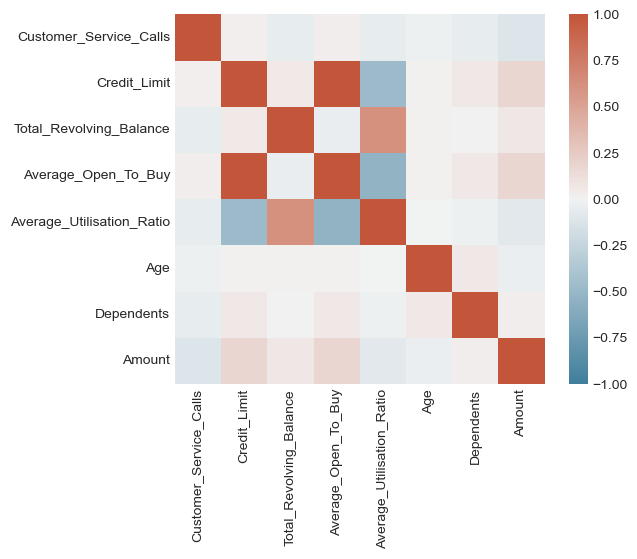

In [163]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, square=True, vmin=-1, vmax=1, cmap=cmap);

### Train / Test Split

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_model[features], df_model.Churn, 
    train_size=0.6, random_state=SEED)

In [165]:
X_train

,Gender,Marital_Status,On_Demand_Deposit,Investment,Credit_Card,Loan,Joint,Mortgage,Current,Deposit,...,Customer_Service_Calls,Credit_Limit,Total_Revolving_Balance,Average_Open_To_Buy,Average_Utilisation_Ratio,Age,Dependents,Amount,Start_Date,Education
4170,F,Married,0,0,1,0,0,0,0,0,...,1,17542.0,2517,15025.0,0.143,56.0,1,13939.05,2018-12-01,Second level
1993,F,Married,1,1,1,1,1,0,0,1,...,3,3136.0,1422,1714.0,0.453,57.0,3,1260.00,2020-01-01,Primary level
1064,M,Married,1,0,1,0,0,1,1,0,...,3,15242.0,1170,14072.0,0.077,57.0,4,1876.00,2019-03-01,Second level
6135,F,Married,0,0,1,0,0,0,0,0,...,3,2772.0,2414,358.0,0.871,53.0,0,5313.02,2019-09-01,Primary level
1819,F,Single,0,1,1,0,1,0,1,1,...,2,8513.0,799,7714.0,0.094,58.0,1,2118.99,2018-11-01,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,F,Married,1,0,1,0,0,0,1,0,...,4,8729.0,1427,7302.0,0.163,44.0,3,5347.03,2020-01-01,Post LC
2462,M,Married,0,0,1,0,0,0,1,1,...,2,4320.0,0,4320.0,0.000,54.0,2,706.01,2019-07-01,Graduate
1298,F,Married,1,1,1,1,0,0,0,1,...,2,9139.0,1620,7519.0,0.177,45.0,4,4674.96,2020-07-01,Second level
5484,F,Single,1,1,1,0,0,1,1,0,...,3,1438.3,986,452.3,0.686,45.0,2,5136.02,2020-01-01,Graduate


In [166]:
y_train

4170     No
1993     No
1064     No
6135     No
1819    Yes
       ... 
6492     No
2462    Yes
1298     No
5484     No
2676     No
Name: Churn, Length: 3933, dtype: object

### Import Classifiers

In [167]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

### Build a Pipeline

In [168]:
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
column_transformer = ColumnTransformer([
    # List of transformation to apply and which columns to apply it to. Each entry here has structure 
    #( NAME,                  CODE,                           COLUMNS_TO_APPLY),
    ( 'categorical_features', preprocessing.OneHotEncoder(),  categorical_features ),
    ( 'numerical_features',   preprocessing.StandardScaler(), numerical_features ),
])

In [169]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ( 'column_transformer', column_transformer ),
    ( 'classifier', LogisticRegression(solver='lbfgs', max_iter=200) ),
])

### Score the model using cross validation scoring function to see how good the initial one is

In [170]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV estimate of accuracy is {scores.mean():.2%} +/ {2*scores.std()/len(scores):.2%}")

CV estimate of accuracy is 87.31% +/ 0.27%


### CV estimate of accuracy is 87.26% +/ 0.25%

In [171]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ( 'column_transformer', column_transformer ),
    ( 'classifier', AdaBoostClassifier() ),
])

In [172]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV estimate of accuracy is {scores.mean():.2%} +/ {2*scores.std()/len(scores):.2%}")

CV estimate of accuracy is 90.92% +/ 0.59%


## CV estimate of accuracy is 91.03% +/ 0.63%


In [192]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ( 'column_transformer', column_transformer ),
    ( 'classifier', GradientBoostingClassifier() ),
])

In [193]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV estimate of accuracy is {scores.mean():.2%} +/ {2*scores.std()/len(scores):.2%}")

CV estimate of accuracy is 92.52% +/ 0.30%


In [194]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('categorical_features',
                                                  OneHotEncoder(),
                                                  ['Gender', 'Marital_Status',
                                                   'On_Demand_Deposit',
                                                   'Investment', 'Credit_Card',
                                                   'Loan', 'Joint', 'Mortgage',
                                                   'Current', 'Deposit', 'Card',
                                                   'Income']),
                                                 ('numerical_features',
                                                  StandardScaler(),
                                                  ['Customer_Service_Calls',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Balance',
   

In [195]:
filename = "Completed_model_01.joblib"

In [196]:
import joblib

In [197]:
joblib.dump(pipeline, filename)

['Completed_model_01.joblib']

In [176]:
y_pred = pipeline.predict(X_test)

In [177]:
y_pred

array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [180]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ( 'column_transformer', column_transformer ),
    ( 'classifier', BernoulliNB() ),
])

In [181]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV estimate of accuracy is {scores.mean():.2%} +/ {2*scores.std()/len(scores):.2%}")

CV estimate of accuracy is 83.12% +/ 0.23%


## CV estimate of accuracy is 83.07% +/ 0.23%

In [182]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ( 'column_transformer', column_transformer ),
    ( 'classifier', KNeighborsClassifier(n_neighbors=9) ),
])

In [183]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f"CV estimate of accuracy is {scores.mean():.2%} +/ {2*scores.std()/len(scores):.2%}")

C:\Users\mccab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mccab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

CV estimate of accuracy is 86.30% +/ 0.34%


C:\Users\mccab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mccab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [184]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    { 
        'classifier__n_neighbors': range(3,17,2),
    }
]

gs = GridSearchCV(pipeline, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

### CV estimate of accuracy is 86.24% +/ 0.27%

In [148]:
gs.fit(X_train, y_train);

In [149]:
gs.best_params_

{'classifier__n_neighbors': 9}